![Logo picture](https://dl.dropbox.com/s/nhp1sbhgx6ueojt/logov10.png)

### 1) Go to the first tab that opened in your internet browser, go to the "LOAD_NIFTI_FILE_HERE" folder, and then upload the nifti (.nii) files that you want to map using the "Upload" button in the top right corner of the page.
### 2) Run LittleBrain:
Click on the cell below and then click on the "Run" button at the top of this page. Then follow the instructions.

Map generated for: phon_diff_fwe_thr6.nii
Threshold selected: 
To save the map go to the "OUTPUT_FILES" folder in the other opened tab in your browser, and download "MAP.png".
You can also right click the image below and select "save image as".
What do you want to do next?:


Button(description='Check transformations', layout=Layout(width='auto'), style=ButtonStyle())

Button(description='See nonbinary map', layout=Layout(width='auto'), style=ButtonStyle())

Button(description='Generate a new map', layout=Layout(width='auto'), style=ButtonStyle())

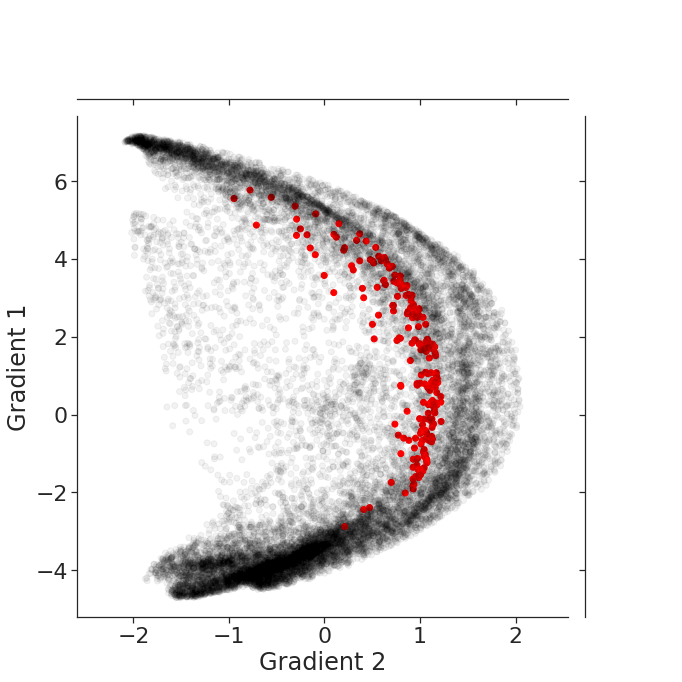

IMAGE 1. Each black dot in the scatterplot represents a cerebellar voxel, position of each dot along x and y axis corresponds to position along gradient 1 and gradient 2 for that cerebellar voxel, and dots shown in red correspond to the voxels that are included in the uploaded file. Gradient 1 and gradient 2 values for these data have been saved in the OUTPUT_FILES folder as "GRADIENT1_values" and "GRADIENT2_values".


In [1]:
# Generate map for the first cluster, but first modify code so that file is 
# saved as "cluster1_image.dscalar.nii" instead of "image.dscalar.nii"

import warnings; warnings.filterwarnings('ignore'); import subprocess, matplotlib, seaborn as sns, matplotlib.pyplot as plt, pandas as pd, matplotlib.cm as cm, nibabel as nib, numpy as np, ipywidgets as widgets, glob, os; from IPython.display import display, clear_output; from ipywidgets import Layout
uploadedfileslist=glob.glob('/src/LittleBrain/LOAD_NIFTI_FILE_HERE/*.nii*'); oldfileslist=glob.glob('/src/LittleBrain/OUTPUT_FILES/image*')
for x in oldfileslist:
    try:
        os.remove(x)
    except:
        pass
for x in uploadedfileslist:
   print(x[38:200]) 
print('\nThe list above shows the nifti files you have uploaded in the "LOAD_NIFTI_FILE_HERE" folder.\nNote that these nifti files must be in MNI space.\nCopy name of nifti file you want to map (including the ".nii" or ".nii.gz" termination) and paste it in the box below:'); text = widgets.Text(); display(text); print('Write a threshold number in the box below if you want to threshold your file; if no threshold leave blank:'); thr = widgets.Text(); display(thr); layout=Layout(width='auto'); button1 = widgets.Button(description='Generate map', layout=layout); display(button1)
def button_clicked(b):
    try:
        %matplotlib inline
        print('Generating map for: '+text.value+'\nThreshold selected: '+thr.value+'\nPlease wait...')
        inputdirectory = ('/src/LittleBrain/LOAD_NIFTI_FILE_HERE/'); outputdirectory = ('/src/LittleBrain/OUTPUT_FILES'); requiredfilesfolder = ('/src/LittleBrain/DEFAULT_FILES'); niftifile = (inputdirectory+text.value); os.chdir(outputdirectory)
        try:
            subprocess.check_output("fslmaths "+niftifile+" -thr "+thr.value+" -mul 100 -bin image_binarized.nii", shell=True);
        except:
            subprocess.check_output("fslmaths "+niftifile+" -mul 100 -bin image_binarized.nii", shell=True);
        subprocess.check_output("gzip -d image_binarized.nii.gz", shell=True);
        subprocess.check_output("flirt -in image_binarized.nii -ref image_binarized.nii -out image_binarized_2mm.nii -applyisoxfm 2 -noresampblur", shell=True);
        subprocess.check_output("gzip -d image_binarized_2mm.nii.gz", shell=True);
        subprocess.check_output("fslroi image_binarized_2mm.nii image_binarized_2mm_resized.nii 0 91 0 109 0 91", shell=True);
        subprocess.check_output("gzip -d image_binarized_2mm_resized.nii.gz", shell=True);
        subprocess.check_output("mri_mask image_binarized_2mm_resized.nii "+requiredfilesfolder+"/cerebellum_bilateral.nii image_binarized_2mm_resized_cerebellummasked.nii", shell=True);
        subprocess.check_output("flirt -2D -interp nearestneighbour -in image_binarized_2mm_resized_cerebellummasked.nii -ref "+requiredfilesfolder+"/cerebellum_bilateral_everything0_forFLIRT.nii -out image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii -usesqform -minsampling 9999", shell=True);
        subprocess.check_output("gzip -d image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii.gz", shell=True);
        
        #Change file name of image.dscalar.nii here:
        subprocess.check_output("wb_command -cifti-create-dense-from-template "+requiredfilesfolder+"/result_fromcerebellumtocerebellum.dscalar.nii cluster1_image.dscalar.nii -volume-all image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii", shell=True);
        
        #Change file name of image.dscalar.nii also here:
        CLUSTER1 = nib.load(outputdirectory+'/cluster1_image.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1 > 0.00000001] = 1; NOTHING = np.zeros((17853,))
        CHANNEL1 = CLUSTER1; CHANNEL2 = NOTHING; CHANNEL3 = NOTHING; CHANNEL4 = NOTHING
        CHANNEL1_R = np.zeros((17853,)); CHANNEL1_G = np.zeros((17853,)); CHANNEL1_B = np.zeros((17853,)); CHANNEL2_R = np.zeros((17853,)); CHANNEL2_G = np.zeros((17853,)); CHANNEL2_B = np.zeros((17853,)); CHANNEL3_R = np.zeros((17853,)); CHANNEL3_G = np.zeros((17853,)); CHANNEL3_B = np.zeros((17853,)); CHANNEL4_R = np.zeros((17853,)); CHANNEL4_G = np.zeros((17853,)); CHANNEL4_B = np.zeros((17853,)); FINAL_CHANNEL_R = np.zeros((17853,)); FINAL_CHANNEL_G = np.zeros((17853,)); FINAL_CHANNEL_B = np.zeros((17853,))
        CHANNEL1_Rvalue = 1; CHANNEL1_Gvalue = 0; CHANNEL1_Bvalue = 0; CHANNEL2_Rvalue = 0; CHANNEL2_Gvalue = 0; CHANNEL2_Bvalue = 0; CHANNEL3_Rvalue = 0; CHANNEL3_Gvalue = 0; CHANNEL3_Bvalue = 0; CHANNEL4_Rvalue = 0; CHANNEL4_Gvalue = 0; CHANNEL4_Bvalue = 0
        CHANNEL1_R = [x+CHANNEL1_Rvalue for x in CHANNEL1_R]; CHANNEL1_R = CHANNEL1_R * CHANNEL1; CHANNEL1_G = [x+CHANNEL1_Gvalue for x in CHANNEL1_G]; CHANNEL1_G = CHANNEL1_G * CHANNEL1; CHANNEL1_B = [x+CHANNEL1_Bvalue for x in CHANNEL1_B]; CHANNEL1_B = CHANNEL1_B * CHANNEL1; CHANNEL2_R = [x+CHANNEL2_Rvalue for x in CHANNEL2_R]; CHANNEL2_R = CHANNEL2_R * CHANNEL2; CHANNEL2_G = [x+CHANNEL2_Gvalue for x in CHANNEL2_G]; CHANNEL2_G = CHANNEL2_G * CHANNEL2; CHANNEL2_B = [x+CHANNEL2_Bvalue for x in CHANNEL2_B]; CHANNEL2_B = CHANNEL2_B * CHANNEL2; CHANNEL3_R = [x+CHANNEL3_Rvalue for x in CHANNEL3_R]; CHANNEL3_R = CHANNEL3_R * CHANNEL3; CHANNEL3_G = [x+CHANNEL3_Gvalue for x in CHANNEL3_G]; CHANNEL3_G = CHANNEL3_G * CHANNEL3; CHANNEL3_B = [x+CHANNEL3_Bvalue for x in CHANNEL3_B]; CHANNEL3_B = CHANNEL3_B * CHANNEL3; CHANNEL4_R = [x+CHANNEL4_Rvalue for x in CHANNEL4_R]; CHANNEL4_R = CHANNEL4_R * CHANNEL4; CHANNEL4_G = [x+CHANNEL4_Gvalue for x in CHANNEL4_G]; CHANNEL4_G = CHANNEL4_G * CHANNEL4; CHANNEL4_B = [x+CHANNEL4_Bvalue for x in CHANNEL4_B]; CHANNEL4_B = CHANNEL4_B * CHANNEL4; FINAL_CHANNEL_R = CHANNEL1_R + CHANNEL2_R + CHANNEL3_R + CHANNEL4_R; FINAL_CHANNEL_G = CHANNEL1_G + CHANNEL2_G + CHANNEL3_G + CHANNEL4_G; FINAL_CHANNEL_B = CHANNEL1_B + CHANNEL2_B + CHANNEL3_B + CHANNEL4_B
        c = np.ones((17853, 4)); c[:,0] = FINAL_CHANNEL_R; c[:,1] = FINAL_CHANNEL_G; c[:,2] = FINAL_CHANNEL_B
        for x in c[:, :]:
            if x[0]==0 and x[1]==0 and x[2]==0:
                x[3] = 0.05
        gradients = nib.load(requiredfilesfolder+'/result_fromcerebellumtocerebellum.dscalar.nii').get_data(); gradients.shape = (8, 17853); gradient1 = gradients[0]; gradient2 = gradients[1]; gradient3 = gradients[2]; gradient4 = gradients[3]; gradient5 = gradients[4]; gradient6 = gradients[5]; gradient7 = gradients[6]; gradient8 = gradients[7]
        sns.set(style="white"); sns.set_context("notebook", font_scale=2); df = pd.DataFrame(); df['e0'] = np.array(gradient1); df['e1'] = np.array(gradient2); sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001}); g = (sns.jointplot('e0', 'e1', data=df,height=10, label='big', linewidth=0, marker='.', alpha=0, color='w', ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1')); g.ax_joint.scatter(df.e1, df.e0, c=c); g.savefig(os.path.abspath(outputdirectory+'/MAP.png'), format='png', dpi=600, transparent=False); clear_output(); print('Map generated for: '+niftifile[38:200]+'\nThreshold selected: '+thr.value+'\nTo save the map go to the "OUTPUT_FILES" folder in the other opened tab in your browser, and download "MAP.png".\nYou can also right click the image below and select "save image as".')
        print('What do you want to do next?:')
        buttonCT = widgets.Button(description='Check transformations', layout=layout); display(buttonCT)
        buttonSNB = widgets.Button(description='See nonbinary map', layout=layout); display(buttonSNB)
        buttonNM = widgets.Button(description='Generate a new map', layout=layout); display(buttonNM)
        buttonSMA = widgets.Button(description='See map again', layout=layout)
        plt.show()
        print('IMAGE 1. Each black dot in the scatterplot represents a cerebellar voxel, position of each dot along x and y axis corresponds to position along gradient 1 and gradient 2 for that cerebellar voxel, and dots shown in red correspond to the voxels that are included in the uploaded file. Gradient 1 and gradient 2 values for these data have been saved in the OUTPUT_FILES folder as "GRADIENT1_values" and "GRADIENT2_values".')
        
        #Change file name of image.dscalar.nii also here:
        CLUSTER1 = nib.load(outputdirectory+'/cluster1_image.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1 > 0.00000001] = 1
        CLUSTER1_gradient1 = gradient1[CLUSTER1>0.5]; CLUSTER1_gradient2 = gradient2[CLUSTER1>0.5]
        
        #Can also change file name of csv file that will store gradient 1 and gradient 2 values:
        np.savetxt(outputdirectory+"/cluster1_GRADIENT1_values.csv", CLUSTER1_gradient1, delimiter=",", fmt='%f'); np.savetxt(outputdirectory+"/cluster1_GRADIENT2_values.csv", CLUSTER1_gradient2, delimiter=",", fmt='%f')
        
        def buttonNM_clicked(d):
            import niwidgets, nilearn.plotting as nip; from niwidgets import NiftiWidget; from IPython.display import display, clear_output; import warnings; warnings.filterwarnings('ignore')
            clear_output()
            try:
                os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized.nii'); os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm.nii');os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm_resized.nii');os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm_resized_cerebellummasked.nii');os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii');os.remove('/src/LittleBrain/OUTPUT_FILES/image.dscalar.nii')
            except:
                pass
            print('To generate a new map, please click "Run" at the top of this page.')
        buttonNM.on_click(buttonNM_clicked)
        def buttonSMA_clicked(d):
            import niwidgets, nilearn.plotting as nip; from niwidgets import NiftiWidget; from IPython.display import display, clear_output; import warnings; warnings.filterwarnings('ignore')
            clear_output()
            print('Generating map, please wait...'); sns.set(style="white"); sns.set_context("notebook", font_scale=2); df = pd.DataFrame(); df['e0'] = np.array(gradient1); df['e1'] = np.array(gradient2); sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001}); g = (sns.jointplot('e0', 'e1', data=df, height=10, label='big', linewidth=0, marker='.', alpha=0, color='w', ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1')); g.ax_joint.scatter(df.e1, df.e0, c=c); g.savefig(os.path.abspath(outputdirectory+'/MAP.png'), format='png', dpi=600, transparent=False); clear_output(); print('Map generated for: '+niftifile[38:200]+'\nThreshold selected: '+thr.value+'\nTo save the map go to the "OUTPUT_FILES" folder in the other opened tab in your browser, and download "MAP.png".\nYou can also right click the image below and select "save image as".')
            print('What do you want to do next?:'); display(buttonCT); display(buttonSNB); display(buttonNM); plt.show()
        buttonSMA.on_click(buttonSMA_clicked)
        def buttonCT_clicked(b):
            import niwidgets, nilearn.plotting as nip; from niwidgets import NiftiWidget; from IPython.display import display, clear_output; import warnings; warnings.filterwarnings('ignore')
            clear_output()
            print('Transformations are shown below. What do you want to do next?:'); display(buttonSMA); display(buttonSNB); display(buttonNM)
            initialfile = NiftiWidget('/src/LittleBrain/OUTPUT_FILES/image_binarized.nii'); finalfile = NiftiWidget('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii')
            initialfile.nifti_plotter(plotting_func=nip.plot_glass_brain, colormap='binary'); print('IMAGE 1. This is the thresholded cluster you have uploaded.')
            finalfile.nifti_plotter(plotting_func=nip.plot_glass_brain, colormap='binary'); print('IMAGE 2. This is a cerebellum-masked, 2mm resolution version of the cluster that has been created to generate the map.\nNote that non-cerebellar parts of the cluster are removed in image 2, as well as parts of the cluster which are in cerebellar white matter. For this reason, the cluster in image 2 might look smaller (indicating that some parts of the cluster you uploaded were outside of the cerebellum, or in cerebellar white matter). To examine this further in your computer, you can access the transformed image by downloading "image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii" from the "OUTPUT_FILES" folder and compare it to the initial nifti file you uploaded. If you want to do this, make sure that you download this image before generating a new map, as files will be over-written.')
        buttonCT.on_click(buttonCT_clicked)
        def buttonSNB_clicked(b):
            oldfileslistNB=glob.glob('/src/LittleBrain/OUTPUT_FILES/image_notbinarized*')
            for x in oldfileslistNB:
                try:
                    os.remove(x)
                except:
                    pass
            import niwidgets, nilearn.plotting as nip; from niwidgets import NiftiWidget; from IPython.display import display, clear_output; import warnings; warnings.filterwarnings('ignore')
            clear_output()
            print('Generating non-binary map for: '+text.value+'\nThreshold selected: '+thr.value+'\nPlease wait...'); import subprocess; import nibabel as nib; import matplotlib; import seaborn as sns; import matplotlib.cm as cm; import os; import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import warnings; warnings.filterwarnings('ignore')
            try:
                subprocess.check_output("fslmaths "+niftifile+" -thr "+thr.value+" -mul 100 image_notbinarized.nii", shell=True);
            except:
                subprocess.check_output("fslmaths "+niftifile+" -mul 100 image_notbinarized.nii", shell=True);
            subprocess.check_output("gzip -f -d image_notbinarized.nii.gz", shell=True);
            subprocess.check_output("flirt -in image_notbinarized.nii -ref image_notbinarized.nii -out image_notbinarized_2mm.nii -applyisoxfm 2 -noresampblur", shell=True);
            subprocess.check_output("gzip -f -d image_notbinarized_2mm.nii.gz", shell=True);
            subprocess.check_output("fslroi image_notbinarized_2mm.nii image_notbinarized_2mm_resized.nii 0 91 0 109 0 91", shell=True);
            subprocess.check_output("gzip -f -d image_notbinarized_2mm_resized.nii.gz", shell=True);
            subprocess.check_output("mri_mask image_notbinarized_2mm_resized.nii "+requiredfilesfolder+"/cerebellum_bilateral.nii image_notbinarized_2mm_resized_cerebellummasked.nii", shell=True);
            subprocess.check_output("flirt -2D -interp nearestneighbour -in image_notbinarized_2mm_resized_cerebellummasked.nii -ref "+requiredfilesfolder+"/cerebellum_bilateral_everything0_forFLIRT.nii -out image_notbinarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii -usesqform -minsampling 9999", shell=True);
            subprocess.check_output("gzip -f -d image_notbinarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii.gz", shell=True);
            subprocess.check_output("wb_command -cifti-create-dense-from-template "+requiredfilesfolder+"/result_fromcerebellumtocerebellum.dscalar.nii image_notbinarized.dscalar.nii -volume-all image_notbinarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii", shell=True);
            import seaborn as sns; import pandas as pd;import matplotlib; import matplotlib.cm as cm; import matplotlib.pyplot as plt; import matplotlib.colorbar as mplclb; from matplotlib.colors import LinearSegmentedColormap; from make_cmap import make_cmap
            CLUSTER1 = nib.load(outputdirectory+'/image_notbinarized.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1==0]= 'NaN'
            gradients = nib.load(requiredfilesfolder+'/result_fromcerebellumtocerebellum.dscalar.nii').get_data(); gradients.shape = (8, 17853); gradient1 = gradients[0]; gradient2 = gradients[1]; gradient3 = gradients[2]; gradient4 = gradients[3]; gradient5 = gradients[4]; gradient6 = gradients[5]; gradient7 = gradients[6]; gradient8 = gradients[7]
            sns.set(style="white"); sns.set_context("notebook", font_scale=2); df = pd.DataFrame(); df['e0'] = np.array(gradient1); df['e1'] = np.array(gradient2); sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001}); 
            g = (sns.jointplot('e0', 'e1', data=df, height=10, label='big', linewidth=0, marker='.', alpha=0, color='w', ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1')); 
            g.ax_joint.scatter(df.e1, df.e0, alpha=0.01, c='k');
            CLUSTER1 = nib.load(outputdirectory+'/image_notbinarized.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]
            inds = np.unique(CLUSTER1).argsort(); i=0
            for x in np.unique(CLUSTER1):
                if x != 0:
                    scale=inds[i]/(np.max(inds)-1); g.ax_joint.scatter(df.e1[CLUSTER1==x], df.e0[CLUSTER1==x], color=(scale, 0, 0.5-(scale/2)));
                    CLUSTER1 = nib.load(outputdirectory+'/image_notbinarized.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; i = i+1
            colors = [(0,0,127), (255,0,0)]; my_cmap = make_cmap(colors, bit=True); m = cm.ScalarMappable(norm=None,cmap=my_cmap)
            m.set_array(CLUSTER1); plt.colorbar(m, orientation="vertical",fraction=0.7).ax.set_yticklabels(['min'])
            g.savefig(os.path.abspath(outputdirectory+'/MAP_nonbinary.png'), format='png', dpi=600, transparent=False); clear_output(); print('Non-binary map generated for: '+niftifile[38:200]+'\nThreshold selected: '+thr.value+'\nTo save the map go to the "OUTPUT_FILES" folder in the other opened tab in your browser, and download "MAP_NONBINARY.png".\nYou can also right click the image below and select "save image as".')
            print('What do you want to do next?:'); display(buttonCT); display(buttonNM); plt.show()
            print('IMAGE 1. Each black dot in the scatterplot represents a cerebellar voxel, position of each dot along x and y axis corresponds to position along gradient 1 and gradient 2 for that cerebellar voxel, and dots shown in color correspond to the voxels that are included in the uploaded file.')
        buttonSNB.on_click(buttonSNB_clicked)        
    except:
        clear_output(); print('An error occurred. Please click "Run" at the top of this page to start again. Make sure that you do the following:\n- Copy the name of the nifti file you want to map including the ".nii" termination.\n- Do not include any spaces before the name of the nifti file.\n- Make sure that the nifti files you upload do not have any spaces in them.\n- Do not write any spaces in the threshold number input box.\n- You can ask for help here: littlebraintoolbox@gmail.com \n- Or post an issue here: github.com/xaviergp/littlebrain')
button1.on_click(button_clicked)
# If you are considering commercial use of FSL, please consult their license at https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Licence

Map generated for: vis_diff_fwe_thr6.nii
Threshold selected: 
To save the map go to the "OUTPUT_FILES" folder in the other opened tab in your browser, and download "MAP.png".
You can also right click the image below and select "save image as".
What do you want to do next?:


Button(description='Check transformations', layout=Layout(width='auto'), style=ButtonStyle())

Button(description='See nonbinary map', layout=Layout(width='auto'), style=ButtonStyle())

Button(description='Generate a new map', layout=Layout(width='auto'), style=ButtonStyle())

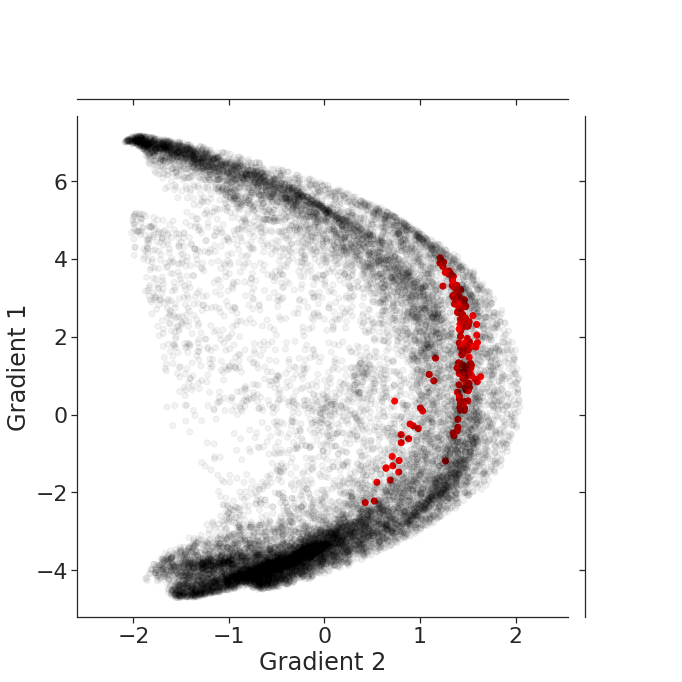

IMAGE 1. Each black dot in the scatterplot represents a cerebellar voxel, position of each dot along x and y axis corresponds to position along gradient 1 and gradient 2 for that cerebellar voxel, and dots shown in red correspond to the voxels that are included in the uploaded file. Gradient 1 and gradient 2 values for these data have been saved in the OUTPUT_FILES folder as "GRADIENT1_values" and "GRADIENT2_values".


In [2]:
# Generate map for the second cluster, but first modify code so that file is 
# saved as "cluster2_image.dscalar.nii" instead of "image.dscalar.nii"

import warnings; warnings.filterwarnings('ignore'); import subprocess, matplotlib, seaborn as sns, matplotlib.pyplot as plt, pandas as pd, matplotlib.cm as cm, nibabel as nib, numpy as np, ipywidgets as widgets, glob, os; from IPython.display import display, clear_output; from ipywidgets import Layout
uploadedfileslist=glob.glob('/src/LittleBrain/LOAD_NIFTI_FILE_HERE/*.nii*'); oldfileslist=glob.glob('/src/LittleBrain/OUTPUT_FILES/image*')
for x in oldfileslist:
    try:
        os.remove(x)
    except:
        pass
for x in uploadedfileslist:
   print(x[38:200]) 
print('\nThe list above shows the nifti files you have uploaded in the "LOAD_NIFTI_FILE_HERE" folder.\nNote that these nifti files must be in MNI space.\nCopy name of nifti file you want to map (including the ".nii" or ".nii.gz" termination) and paste it in the box below:'); text = widgets.Text(); display(text); print('Write a threshold number in the box below if you want to threshold your file; if no threshold leave blank:'); thr = widgets.Text(); display(thr); layout=Layout(width='auto'); button1 = widgets.Button(description='Generate map', layout=layout); display(button1)
def button_clicked(b):
    try:
        %matplotlib inline
        print('Generating map for: '+text.value+'\nThreshold selected: '+thr.value+'\nPlease wait...')
        inputdirectory = ('/src/LittleBrain/LOAD_NIFTI_FILE_HERE/'); outputdirectory = ('/src/LittleBrain/OUTPUT_FILES'); requiredfilesfolder = ('/src/LittleBrain/DEFAULT_FILES'); niftifile = (inputdirectory+text.value); os.chdir(outputdirectory)
        try:
            subprocess.check_output("fslmaths "+niftifile+" -thr "+thr.value+" -mul 100 -bin image_binarized.nii", shell=True);
        except:
            subprocess.check_output("fslmaths "+niftifile+" -mul 100 -bin image_binarized.nii", shell=True);
        subprocess.check_output("gzip -d image_binarized.nii.gz", shell=True);
        subprocess.check_output("flirt -in image_binarized.nii -ref image_binarized.nii -out image_binarized_2mm.nii -applyisoxfm 2 -noresampblur", shell=True);
        subprocess.check_output("gzip -d image_binarized_2mm.nii.gz", shell=True);
        subprocess.check_output("fslroi image_binarized_2mm.nii image_binarized_2mm_resized.nii 0 91 0 109 0 91", shell=True);
        subprocess.check_output("gzip -d image_binarized_2mm_resized.nii.gz", shell=True);
        subprocess.check_output("mri_mask image_binarized_2mm_resized.nii "+requiredfilesfolder+"/cerebellum_bilateral.nii image_binarized_2mm_resized_cerebellummasked.nii", shell=True);
        subprocess.check_output("flirt -2D -interp nearestneighbour -in image_binarized_2mm_resized_cerebellummasked.nii -ref "+requiredfilesfolder+"/cerebellum_bilateral_everything0_forFLIRT.nii -out image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii -usesqform -minsampling 9999", shell=True);
        subprocess.check_output("gzip -d image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii.gz", shell=True);
        
        #Change file name of image.dscalar.nii here:
        subprocess.check_output("wb_command -cifti-create-dense-from-template "+requiredfilesfolder+"/result_fromcerebellumtocerebellum.dscalar.nii cluster2_image.dscalar.nii -volume-all image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii", shell=True);
        
        #Change file name of image.dscalar.nii also here:
        CLUSTER1 = nib.load(outputdirectory+'/cluster2_image.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1 > 0.00000001] = 1; NOTHING = np.zeros((17853,))
        CHANNEL1 = CLUSTER1; CHANNEL2 = NOTHING; CHANNEL3 = NOTHING; CHANNEL4 = NOTHING
        CHANNEL1_R = np.zeros((17853,)); CHANNEL1_G = np.zeros((17853,)); CHANNEL1_B = np.zeros((17853,)); CHANNEL2_R = np.zeros((17853,)); CHANNEL2_G = np.zeros((17853,)); CHANNEL2_B = np.zeros((17853,)); CHANNEL3_R = np.zeros((17853,)); CHANNEL3_G = np.zeros((17853,)); CHANNEL3_B = np.zeros((17853,)); CHANNEL4_R = np.zeros((17853,)); CHANNEL4_G = np.zeros((17853,)); CHANNEL4_B = np.zeros((17853,)); FINAL_CHANNEL_R = np.zeros((17853,)); FINAL_CHANNEL_G = np.zeros((17853,)); FINAL_CHANNEL_B = np.zeros((17853,))
        CHANNEL1_Rvalue = 1; CHANNEL1_Gvalue = 0; CHANNEL1_Bvalue = 0; CHANNEL2_Rvalue = 0; CHANNEL2_Gvalue = 0; CHANNEL2_Bvalue = 0; CHANNEL3_Rvalue = 0; CHANNEL3_Gvalue = 0; CHANNEL3_Bvalue = 0; CHANNEL4_Rvalue = 0; CHANNEL4_Gvalue = 0; CHANNEL4_Bvalue = 0
        CHANNEL1_R = [x+CHANNEL1_Rvalue for x in CHANNEL1_R]; CHANNEL1_R = CHANNEL1_R * CHANNEL1; CHANNEL1_G = [x+CHANNEL1_Gvalue for x in CHANNEL1_G]; CHANNEL1_G = CHANNEL1_G * CHANNEL1; CHANNEL1_B = [x+CHANNEL1_Bvalue for x in CHANNEL1_B]; CHANNEL1_B = CHANNEL1_B * CHANNEL1; CHANNEL2_R = [x+CHANNEL2_Rvalue for x in CHANNEL2_R]; CHANNEL2_R = CHANNEL2_R * CHANNEL2; CHANNEL2_G = [x+CHANNEL2_Gvalue for x in CHANNEL2_G]; CHANNEL2_G = CHANNEL2_G * CHANNEL2; CHANNEL2_B = [x+CHANNEL2_Bvalue for x in CHANNEL2_B]; CHANNEL2_B = CHANNEL2_B * CHANNEL2; CHANNEL3_R = [x+CHANNEL3_Rvalue for x in CHANNEL3_R]; CHANNEL3_R = CHANNEL3_R * CHANNEL3; CHANNEL3_G = [x+CHANNEL3_Gvalue for x in CHANNEL3_G]; CHANNEL3_G = CHANNEL3_G * CHANNEL3; CHANNEL3_B = [x+CHANNEL3_Bvalue for x in CHANNEL3_B]; CHANNEL3_B = CHANNEL3_B * CHANNEL3; CHANNEL4_R = [x+CHANNEL4_Rvalue for x in CHANNEL4_R]; CHANNEL4_R = CHANNEL4_R * CHANNEL4; CHANNEL4_G = [x+CHANNEL4_Gvalue for x in CHANNEL4_G]; CHANNEL4_G = CHANNEL4_G * CHANNEL4; CHANNEL4_B = [x+CHANNEL4_Bvalue for x in CHANNEL4_B]; CHANNEL4_B = CHANNEL4_B * CHANNEL4; FINAL_CHANNEL_R = CHANNEL1_R + CHANNEL2_R + CHANNEL3_R + CHANNEL4_R; FINAL_CHANNEL_G = CHANNEL1_G + CHANNEL2_G + CHANNEL3_G + CHANNEL4_G; FINAL_CHANNEL_B = CHANNEL1_B + CHANNEL2_B + CHANNEL3_B + CHANNEL4_B
        c = np.ones((17853, 4)); c[:,0] = FINAL_CHANNEL_R; c[:,1] = FINAL_CHANNEL_G; c[:,2] = FINAL_CHANNEL_B
        for x in c[:, :]:
            if x[0]==0 and x[1]==0 and x[2]==0:
                x[3] = 0.05
        gradients = nib.load(requiredfilesfolder+'/result_fromcerebellumtocerebellum.dscalar.nii').get_data(); gradients.shape = (8, 17853); gradient1 = gradients[0]; gradient2 = gradients[1]; gradient3 = gradients[2]; gradient4 = gradients[3]; gradient5 = gradients[4]; gradient6 = gradients[5]; gradient7 = gradients[6]; gradient8 = gradients[7]
        sns.set(style="white"); sns.set_context("notebook", font_scale=2); df = pd.DataFrame(); df['e0'] = np.array(gradient1); df['e1'] = np.array(gradient2); sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001}); g = (sns.jointplot('e0', 'e1', data=df,height=10, label='big', linewidth=0, marker='.', alpha=0, color='w', ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1')); g.ax_joint.scatter(df.e1, df.e0, c=c); g.savefig(os.path.abspath(outputdirectory+'/MAP.png'), format='png', dpi=600, transparent=False); clear_output(); print('Map generated for: '+niftifile[38:200]+'\nThreshold selected: '+thr.value+'\nTo save the map go to the "OUTPUT_FILES" folder in the other opened tab in your browser, and download "MAP.png".\nYou can also right click the image below and select "save image as".')
        print('What do you want to do next?:')
        buttonCT = widgets.Button(description='Check transformations', layout=layout); display(buttonCT)
        buttonSNB = widgets.Button(description='See nonbinary map', layout=layout); display(buttonSNB)
        buttonNM = widgets.Button(description='Generate a new map', layout=layout); display(buttonNM)
        buttonSMA = widgets.Button(description='See map again', layout=layout)
        plt.show()
        print('IMAGE 1. Each black dot in the scatterplot represents a cerebellar voxel, position of each dot along x and y axis corresponds to position along gradient 1 and gradient 2 for that cerebellar voxel, and dots shown in red correspond to the voxels that are included in the uploaded file. Gradient 1 and gradient 2 values for these data have been saved in the OUTPUT_FILES folder as "GRADIENT1_values" and "GRADIENT2_values".')
        
        #Change file name of image.dscalar.nii also here:
        CLUSTER1 = nib.load(outputdirectory+'/cluster2_image.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1 > 0.00000001] = 1
        CLUSTER1_gradient1 = gradient1[CLUSTER1>0.5]; CLUSTER1_gradient2 = gradient2[CLUSTER1>0.5]
        
        #Can also change file name of csv file that will store gradient 1 and gradient 2 values:
        np.savetxt(outputdirectory+"/cluster2_GRADIENT1_values.csv", CLUSTER1_gradient1, delimiter=",", fmt='%f'); np.savetxt(outputdirectory+"/cluster2_GRADIENT2_values.csv", CLUSTER1_gradient1, delimiter=",", fmt='%f')
        
        def buttonNM_clicked(d):
            import niwidgets, nilearn.plotting as nip; from niwidgets import NiftiWidget; from IPython.display import display, clear_output; import warnings; warnings.filterwarnings('ignore')
            clear_output()
            try:
                os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized.nii'); os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm.nii');os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm_resized.nii');os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm_resized_cerebellummasked.nii');os.remove('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii');os.remove('/src/LittleBrain/OUTPUT_FILES/image.dscalar.nii')
            except:
                pass
            print('To generate a new map, please click "Run" at the top of this page.')
        buttonNM.on_click(buttonNM_clicked)
        def buttonSMA_clicked(d):
            import niwidgets, nilearn.plotting as nip; from niwidgets import NiftiWidget; from IPython.display import display, clear_output; import warnings; warnings.filterwarnings('ignore')
            clear_output()
            print('Generating map, please wait...'); sns.set(style="white"); sns.set_context("notebook", font_scale=2); df = pd.DataFrame(); df['e0'] = np.array(gradient1); df['e1'] = np.array(gradient2); sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001}); g = (sns.jointplot('e0', 'e1', data=df, height=10, label='big', linewidth=0, marker='.', alpha=0, color='w', ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1')); g.ax_joint.scatter(df.e1, df.e0, c=c); g.savefig(os.path.abspath(outputdirectory+'/MAP.png'), format='png', dpi=600, transparent=False); clear_output(); print('Map generated for: '+niftifile[38:200]+'\nThreshold selected: '+thr.value+'\nTo save the map go to the "OUTPUT_FILES" folder in the other opened tab in your browser, and download "MAP.png".\nYou can also right click the image below and select "save image as".')
            print('What do you want to do next?:'); display(buttonCT); display(buttonSNB); display(buttonNM); plt.show()
        buttonSMA.on_click(buttonSMA_clicked)
        def buttonCT_clicked(b):
            import niwidgets, nilearn.plotting as nip; from niwidgets import NiftiWidget; from IPython.display import display, clear_output; import warnings; warnings.filterwarnings('ignore')
            clear_output()
            print('Transformations are shown below. What do you want to do next?:'); display(buttonSMA); display(buttonSNB); display(buttonNM)
            initialfile = NiftiWidget('/src/LittleBrain/OUTPUT_FILES/image_binarized.nii'); finalfile = NiftiWidget('/src/LittleBrain/OUTPUT_FILES/image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii')
            initialfile.nifti_plotter(plotting_func=nip.plot_glass_brain, colormap='binary'); print('IMAGE 1. This is the thresholded cluster you have uploaded.')
            finalfile.nifti_plotter(plotting_func=nip.plot_glass_brain, colormap='binary'); print('IMAGE 2. This is a cerebellum-masked, 2mm resolution version of the cluster that has been created to generate the map.\nNote that non-cerebellar parts of the cluster are removed in image 2, as well as parts of the cluster which are in cerebellar white matter. For this reason, the cluster in image 2 might look smaller (indicating that some parts of the cluster you uploaded were outside of the cerebellum, or in cerebellar white matter). To examine this further in your computer, you can access the transformed image by downloading "image_binarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii" from the "OUTPUT_FILES" folder and compare it to the initial nifti file you uploaded. If you want to do this, make sure that you download this image before generating a new map, as files will be over-written.')
        buttonCT.on_click(buttonCT_clicked)
        def buttonSNB_clicked(b):
            oldfileslistNB=glob.glob('/src/LittleBrain/OUTPUT_FILES/image_notbinarized*')
            for x in oldfileslistNB:
                try:
                    os.remove(x)
                except:
                    pass
            import niwidgets, nilearn.plotting as nip; from niwidgets import NiftiWidget; from IPython.display import display, clear_output; import warnings; warnings.filterwarnings('ignore')
            clear_output()
            print('Generating non-binary map for: '+text.value+'\nThreshold selected: '+thr.value+'\nPlease wait...'); import subprocess; import nibabel as nib; import matplotlib; import seaborn as sns; import matplotlib.cm as cm; import os; import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import warnings; warnings.filterwarnings('ignore')
            try:
                subprocess.check_output("fslmaths "+niftifile+" -thr "+thr.value+" -mul 100 image_notbinarized.nii", shell=True);
            except:
                subprocess.check_output("fslmaths "+niftifile+" -mul 100 image_notbinarized.nii", shell=True);
            subprocess.check_output("gzip -f -d image_notbinarized.nii.gz", shell=True);
            subprocess.check_output("flirt -in image_notbinarized.nii -ref image_notbinarized.nii -out image_notbinarized_2mm.nii -applyisoxfm 2 -noresampblur", shell=True);
            subprocess.check_output("gzip -f -d image_notbinarized_2mm.nii.gz", shell=True);
            subprocess.check_output("fslroi image_notbinarized_2mm.nii image_notbinarized_2mm_resized.nii 0 91 0 109 0 91", shell=True);
            subprocess.check_output("gzip -f -d image_notbinarized_2mm_resized.nii.gz", shell=True);
            subprocess.check_output("mri_mask image_notbinarized_2mm_resized.nii "+requiredfilesfolder+"/cerebellum_bilateral.nii image_notbinarized_2mm_resized_cerebellummasked.nii", shell=True);
            subprocess.check_output("flirt -2D -interp nearestneighbour -in image_notbinarized_2mm_resized_cerebellummasked.nii -ref "+requiredfilesfolder+"/cerebellum_bilateral_everything0_forFLIRT.nii -out image_notbinarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii -usesqform -minsampling 9999", shell=True);
            subprocess.check_output("gzip -f -d image_notbinarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii.gz", shell=True);
            subprocess.check_output("wb_command -cifti-create-dense-from-template "+requiredfilesfolder+"/result_fromcerebellumtocerebellum.dscalar.nii image_notbinarized.dscalar.nii -volume-all image_notbinarized_2mm_resized_cerebellummasked_postsecondFLIRT.nii", shell=True);
            import seaborn as sns; import pandas as pd;import matplotlib; import matplotlib.cm as cm; import matplotlib.pyplot as plt; import matplotlib.colorbar as mplclb; from matplotlib.colors import LinearSegmentedColormap; from make_cmap import make_cmap
            CLUSTER1 = nib.load(outputdirectory+'/image_notbinarized.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1==0]= 'NaN'
            gradients = nib.load(requiredfilesfolder+'/result_fromcerebellumtocerebellum.dscalar.nii').get_data(); gradients.shape = (8, 17853); gradient1 = gradients[0]; gradient2 = gradients[1]; gradient3 = gradients[2]; gradient4 = gradients[3]; gradient5 = gradients[4]; gradient6 = gradients[5]; gradient7 = gradients[6]; gradient8 = gradients[7]
            sns.set(style="white"); sns.set_context("notebook", font_scale=2); df = pd.DataFrame(); df['e0'] = np.array(gradient1); df['e1'] = np.array(gradient2); sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001}); 
            g = (sns.jointplot('e0', 'e1', data=df, height=10, label='big', linewidth=0, marker='.', alpha=0, color='w', ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1')); 
            g.ax_joint.scatter(df.e1, df.e0, alpha=0.01, c='k');
            CLUSTER1 = nib.load(outputdirectory+'/image_notbinarized.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]
            inds = np.unique(CLUSTER1).argsort(); i=0
            for x in np.unique(CLUSTER1):
                if x != 0:
                    scale=inds[i]/(np.max(inds)-1); g.ax_joint.scatter(df.e1[CLUSTER1==x], df.e0[CLUSTER1==x], color=(scale, 0, 0.5-(scale/2)));
                    CLUSTER1 = nib.load(outputdirectory+'/image_notbinarized.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; i = i+1
            colors = [(0,0,127), (255,0,0)]; my_cmap = make_cmap(colors, bit=True); m = cm.ScalarMappable(norm=None,cmap=my_cmap)
            m.set_array(CLUSTER1); plt.colorbar(m, orientation="vertical",fraction=0.7).ax.set_yticklabels(['min'])
            g.savefig(os.path.abspath(outputdirectory+'/MAP_nonbinary.png'), format='png', dpi=600, transparent=False); clear_output(); print('Non-binary map generated for: '+niftifile[38:200]+'\nThreshold selected: '+thr.value+'\nTo save the map go to the "OUTPUT_FILES" folder in the other opened tab in your browser, and download "MAP_NONBINARY.png".\nYou can also right click the image below and select "save image as".')
            print('What do you want to do next?:'); display(buttonCT); display(buttonNM); plt.show()
            print('IMAGE 1. Each black dot in the scatterplot represents a cerebellar voxel, position of each dot along x and y axis corresponds to position along gradient 1 and gradient 2 for that cerebellar voxel, and dots shown in color correspond to the voxels that are included in the uploaded file.')
        buttonSNB.on_click(buttonSNB_clicked)        
    except:
        clear_output(); print('An error occurred. Please click "Run" at the top of this page to start again. Make sure that you do the following:\n- Copy the name of the nifti file you want to map including the ".nii" termination.\n- Do not include any spaces before the name of the nifti file.\n- Make sure that the nifti files you upload do not have any spaces in them.\n- Do not write any spaces in the threshold number input box.\n- You can ask for help here: littlebraintoolbox@gmail.com \n- Or post an issue here: github.com/xaviergp/littlebrain')
button1.on_click(button_clicked)
# If you are considering commercial use of FSL, please consult their license at https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/Licence

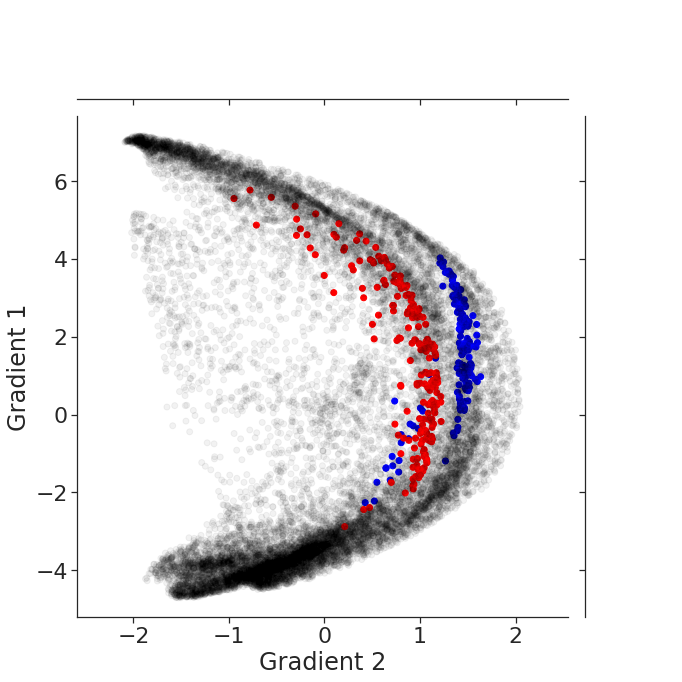

In [3]:
inputdirectory = ('/src/LittleBrain/LOAD_NIFTI_FILE_HERE/'); outputdirectory = ('/src/LittleBrain/OUTPUT_FILES'); requiredfilesfolder = ('/src/LittleBrain/DEFAULT_FILES'); os.chdir(outputdirectory)

# Copy code that generates scatterplot, and include both clusters:
%matplotlib inline
CLUSTER1 = nib.load(outputdirectory+'/cluster1_image.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1 > 0.00000001] = 1; NOTHING = np.zeros((17853,))
CLUSTER2 = nib.load(outputdirectory+'/cluster2_image.dscalar.nii').get_data(); CLUSTER2 = CLUSTER2[0]; CLUSTER2[CLUSTER2 > 0.00000001] = 1;

# Assign the second cluster to CHANNEL2:
CHANNEL1 = CLUSTER1; CHANNEL2 = CLUSTER2; CHANNEL3 = NOTHING; CHANNEL4 = NOTHING; CHANNEL5 = NOTHING; CHANNEL6 = NOTHING; CHANNEL7 = NOTHING; CHANNEL8 = NOTHING; CHANNEL9 = NOTHING; CHANNEL10 = NOTHING
CHANNEL1_R = np.zeros((17853,)); CHANNEL1_G = np.zeros((17853,)); CHANNEL1_B = np.zeros((17853,)); CHANNEL2_R = np.zeros((17853,)); CHANNEL2_G = np.zeros((17853,)); CHANNEL2_B = np.zeros((17853,)); CHANNEL3_R = np.zeros((17853,)); CHANNEL3_G = np.zeros((17853,)); CHANNEL3_B = np.zeros((17853,)); CHANNEL4_R = np.zeros((17853,)); CHANNEL4_G = np.zeros((17853,)); CHANNEL4_B = np.zeros((17853,)); CHANNEL5_R = np.zeros((17853,)); CHANNEL5_G = np.zeros((17853,)); CHANNEL5_B = np.zeros((17853,)); CHANNEL6_R = np.zeros((17853,)); CHANNEL6_G = np.zeros((17853,)); CHANNEL6_B = np.zeros((17853,)); CHANNEL7_R = np.zeros((17853,)); CHANNEL7_G = np.zeros((17853,)); CHANNEL7_B = np.zeros((17853,)); CHANNEL8_R = np.zeros((17853,)); CHANNEL8_G = np.zeros((17853,)); CHANNEL8_B = np.zeros((17853,)); CHANNEL9_R = np.zeros((17853,)); CHANNEL9_G = np.zeros((17853,)); CHANNEL9_B = np.zeros((17853,)); CHANNEL10_R = np.zeros((17853,)); CHANNEL10_G = np.zeros((17853,)); CHANNEL10_B =  np.zeros((17853,)); FINAL_CHANNEL_R = np.zeros((17853,)); FINAL_CHANNEL_G = np.zeros((17853,)); FINAL_CHANNEL_B = np.zeros((17853,))

# Change color of channel 2 by changing its RGB values:
CHANNEL1_Rvalue = 1; CHANNEL1_Gvalue = 0; CHANNEL1_Bvalue = 0; CHANNEL2_Rvalue = 0; CHANNEL2_Gvalue = 0; CHANNEL2_Bvalue = 1; CHANNEL3_Rvalue = 0; CHANNEL3_Gvalue = 0; CHANNEL3_Bvalue = 0; CHANNEL4_Rvalue = 0; CHANNEL4_Gvalue = 0; CHANNEL4_Bvalue = 0; CHANNEL5_Rvalue = 0; CHANNEL5_Gvalue = 0; CHANNEL5_Bvalue = 0; CHANNEL6_Rvalue = 0; CHANNEL6_Gvalue = 0; CHANNEL6_Bvalue = 0; CHANNEL7_Rvalue = 0; CHANNEL7_Gvalue = 0; CHANNEL7_Bvalue = 0; CHANNEL8_Rvalue = 0; CHANNEL8_Gvalue = 0; CHANNEL8_Bvalue = 0; CHANNEL9_Rvalue = 0; CHANNEL9_Gvalue = 0; CHANNEL9_Bvalue = 0; CHANNEL10_Rvalue = 0; CHANNEL10_Gvalue = 0; CHANNEL10_Bvalue = 0
CHANNEL1_R = [x+CHANNEL1_Rvalue for x in CHANNEL1_R]; CHANNEL1_R = CHANNEL1_R * CHANNEL1; CHANNEL1_G = [x+CHANNEL1_Gvalue for x in CHANNEL1_G]; CHANNEL1_G = CHANNEL1_G * CHANNEL1; CHANNEL1_B = [x+CHANNEL1_Bvalue for x in CHANNEL1_B]; CHANNEL1_B = CHANNEL1_B * CHANNEL1; CHANNEL2_R = [x+CHANNEL2_Rvalue for x in CHANNEL2_R]; CHANNEL2_R = CHANNEL2_R * CHANNEL2; CHANNEL2_G = [x+CHANNEL2_Gvalue for x in CHANNEL2_G]; CHANNEL2_G = CHANNEL2_G * CHANNEL2; CHANNEL2_B = [x+CHANNEL2_Bvalue for x in CHANNEL2_B]; CHANNEL2_B = CHANNEL2_B * CHANNEL2; CHANNEL3_R = [x+CHANNEL3_Rvalue for x in CHANNEL3_R]; CHANNEL3_R = CHANNEL3_R * CHANNEL3; CHANNEL3_G = [x+CHANNEL3_Gvalue for x in CHANNEL3_G]; CHANNEL3_G = CHANNEL3_G * CHANNEL3; CHANNEL3_B = [x+CHANNEL3_Bvalue for x in CHANNEL3_B]; CHANNEL3_B = CHANNEL3_B * CHANNEL3; CHANNEL4_R = [x+CHANNEL4_Rvalue for x in CHANNEL4_R]; CHANNEL4_R = CHANNEL4_R * CHANNEL4; CHANNEL4_G = [x+CHANNEL4_Gvalue for x in CHANNEL4_G]; CHANNEL4_G = CHANNEL4_G * CHANNEL4; CHANNEL4_B = [x+CHANNEL4_Bvalue for x in CHANNEL4_B]; CHANNEL4_B = CHANNEL4_B * CHANNEL4; CHANNEL5_R = [x+CHANNEL5_Rvalue for x in CHANNEL5_R]; CHANNEL5_R = CHANNEL5_R * CHANNEL5; CHANNEL5_G = [x+CHANNEL5_Gvalue for x in CHANNEL5_G]; CHANNEL5_G = CHANNEL5_G * CHANNEL5; CHANNEL5_B = [x+CHANNEL5_Bvalue for x in CHANNEL5_B]; CHANNEL5_B = CHANNEL5_B * CHANNEL5; CHANNEL6_R = [x+CHANNEL6_Rvalue for x in CHANNEL6_R]; CHANNEL6_R = CHANNEL6_R * CHANNEL6; CHANNEL6_G = [x+CHANNEL6_Gvalue for x in CHANNEL6_G]; CHANNEL6_G = CHANNEL6_G * CHANNEL6; CHANNEL6_B = [x+CHANNEL6_Bvalue for x in CHANNEL6_B]; CHANNEL6_B = CHANNEL6_B * CHANNEL6; CHANNEL7_R = [x+CHANNEL7_Rvalue for x in CHANNEL7_R]; CHANNEL7_R = CHANNEL7_R * CHANNEL7; CHANNEL7_G = [x+CHANNEL7_Gvalue for x in CHANNEL7_G]; CHANNEL7_G = CHANNEL7_G * CHANNEL7; CHANNEL7_B = [x+CHANNEL7_Bvalue for x in CHANNEL7_B]; CHANNEL7_B = CHANNEL7_B * CHANNEL7; CHANNEL8_R = [x+CHANNEL8_Rvalue for x in CHANNEL8_R]; CHANNEL8_R = CHANNEL8_R * CHANNEL8; CHANNEL8_G = [x+CHANNEL8_Gvalue for x in CHANNEL8_G]; CHANNEL8_G = CHANNEL8_G * CHANNEL8; CHANNEL8_B = [x+CHANNEL8_Bvalue for x in CHANNEL8_B]; CHANNEL8_B = CHANNEL8_B * CHANNEL8; CHANNEL9_R = [x+CHANNEL9_Rvalue for x in CHANNEL9_R]; CHANNEL9_R = CHANNEL9_R * CHANNEL9; CHANNEL9_G = [x+CHANNEL9_Gvalue for x in CHANNEL9_G]; CHANNEL9_G = CHANNEL9_G * CHANNEL9; CHANNEL9_B = [x+CHANNEL9_Bvalue for x in CHANNEL9_B]; CHANNEL9_B = CHANNEL9_B * CHANNEL9; CHANNEL10_R = [x+CHANNEL10_Rvalue for x in CHANNEL10_R]; CHANNEL10_R = CHANNEL10_R * CHANNEL10; CHANNEL10_G = [x+CHANNEL10_Gvalue for x in CHANNEL10_G]; CHANNEL10_G = CHANNEL10_G * CHANNEL10; CHANNEL10_B = [x+CHANNEL10_Bvalue for x in CHANNEL10_B]; CHANNEL10_B = CHANNEL10_B * CHANNEL10; FINAL_CHANNEL_R = CHANNEL1_R + CHANNEL2_R + CHANNEL3_R + CHANNEL4_R + CHANNEL5_R + CHANNEL6_R + CHANNEL7_R + CHANNEL8_R + CHANNEL9_R + CHANNEL10_R ; FINAL_CHANNEL_G = CHANNEL1_G + CHANNEL2_G + CHANNEL3_G + CHANNEL4_G + CHANNEL5_G + CHANNEL6_G + CHANNEL7_G + CHANNEL8_G + CHANNEL9_G + CHANNEL10_G; FINAL_CHANNEL_B = CHANNEL1_B + CHANNEL2_B + CHANNEL3_B + CHANNEL4_B + CHANNEL5_B + CHANNEL6_B + CHANNEL7_B + CHANNEL8_B + CHANNEL9_B + CHANNEL10_B
c = np.ones((17853, 4)); c[:,0] = FINAL_CHANNEL_R; c[:,1] = FINAL_CHANNEL_G; c[:,2] = FINAL_CHANNEL_B
for x in c[:, :]:
    if x[0]==0 and x[1]==0 and x[2]==0:
        x[3] = 0.05
gradients = nib.load(requiredfilesfolder+'/result_fromcerebellumtocerebellum.dscalar.nii').get_data(); gradients.shape = (8, 17853); gradient1 = gradients[0]; gradient2 = gradients[1]; gradient3 = gradients[2]; gradient4 = gradients[3]; gradient5 = gradients[4]; gradient6 = gradients[5]; gradient7 = gradients[6]; gradient8 = gradients[7]
sns.set(style="white"); sns.set_context("notebook", font_scale=2); df = pd.DataFrame(); df['e0'] = np.array(gradient1); df['e1'] = np.array(gradient2); sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001}); g = (sns.jointplot('e0', 'e1', data=df,size=10, label='big', linewidth=0, marker='.', alpha=0, color='w', ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], stat_func=None).set_axis_labels('Gradient 2', 'Gradient 1')); g.ax_joint.scatter(df.e1, df.e0, c=c);

# Save MAP.png with a new name (MAPcombined.png)
g.savefig(os.path.abspath(outputdirectory+'/MAPcombined.png'), format='png', dpi=600, transparent=False); clear_output()
plt.show()

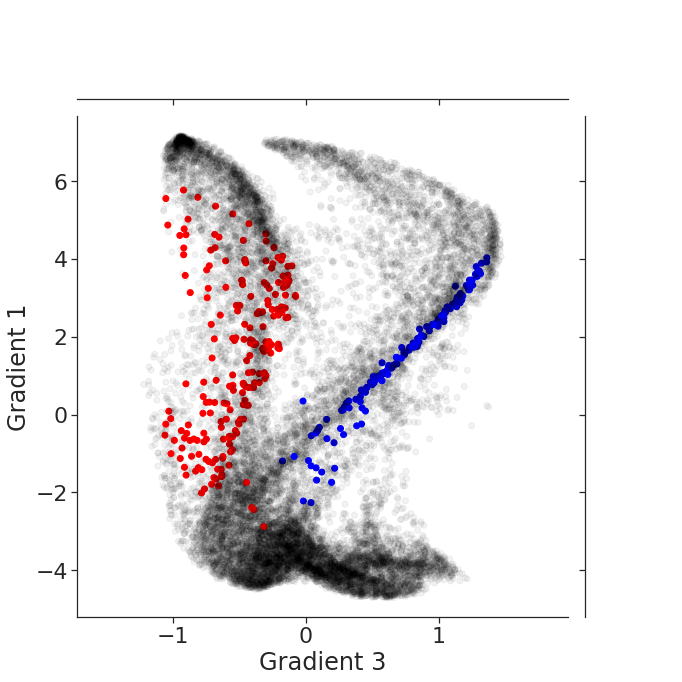

In [4]:
# To use other gradients, assign a different name in df['e0'] or df['e1']

inputdirectory = ('/src/LittleBrain/LOAD_NIFTI_FILE_HERE/'); outputdirectory = ('/src/LittleBrain/OUTPUT_FILES'); requiredfilesfolder = ('/src/LittleBrain/DEFAULT_FILES'); os.chdir(outputdirectory)

%matplotlib inline
CLUSTER1 = nib.load(outputdirectory+'/cluster1_image.dscalar.nii').get_data(); CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1 > 0.00000001] = 1; NOTHING = np.zeros((17853,))
CLUSTER2 = nib.load(outputdirectory+'/cluster2_image.dscalar.nii').get_data(); CLUSTER2 = CLUSTER2[0]; CLUSTER2[CLUSTER2 > 0.00000001] = 1;

CHANNEL1 = CLUSTER1; CHANNEL2 = CLUSTER2; CHANNEL3 = NOTHING; CHANNEL4 = NOTHING; CHANNEL5 = NOTHING; CHANNEL6 = NOTHING; CHANNEL7 = NOTHING; CHANNEL8 = NOTHING; CHANNEL9 = NOTHING; CHANNEL10 = NOTHING
CHANNEL1_R = np.zeros((17853,)); CHANNEL1_G = np.zeros((17853,)); CHANNEL1_B = np.zeros((17853,)); CHANNEL2_R = np.zeros((17853,)); CHANNEL2_G = np.zeros((17853,)); CHANNEL2_B = np.zeros((17853,)); CHANNEL3_R = np.zeros((17853,)); CHANNEL3_G = np.zeros((17853,)); CHANNEL3_B = np.zeros((17853,)); CHANNEL4_R = np.zeros((17853,)); CHANNEL4_G = np.zeros((17853,)); CHANNEL4_B = np.zeros((17853,)); CHANNEL5_R = np.zeros((17853,)); CHANNEL5_G = np.zeros((17853,)); CHANNEL5_B = np.zeros((17853,)); CHANNEL6_R = np.zeros((17853,)); CHANNEL6_G = np.zeros((17853,)); CHANNEL6_B = np.zeros((17853,)); CHANNEL7_R = np.zeros((17853,)); CHANNEL7_G = np.zeros((17853,)); CHANNEL7_B = np.zeros((17853,)); CHANNEL8_R = np.zeros((17853,)); CHANNEL8_G = np.zeros((17853,)); CHANNEL8_B = np.zeros((17853,)); CHANNEL9_R = np.zeros((17853,)); CHANNEL9_G = np.zeros((17853,)); CHANNEL9_B = np.zeros((17853,)); CHANNEL10_R = np.zeros((17853,)); CHANNEL10_G = np.zeros((17853,)); CHANNEL10_B =  np.zeros((17853,)); FINAL_CHANNEL_R = np.zeros((17853,)); FINAL_CHANNEL_G = np.zeros((17853,)); FINAL_CHANNEL_B = np.zeros((17853,))

CHANNEL1_Rvalue = 1; CHANNEL1_Gvalue = 0; CHANNEL1_Bvalue = 0; CHANNEL2_Rvalue = 0; CHANNEL2_Gvalue = 0; CHANNEL2_Bvalue = 1; CHANNEL3_Rvalue = 0; CHANNEL3_Gvalue = 0; CHANNEL3_Bvalue = 0; CHANNEL4_Rvalue = 0; CHANNEL4_Gvalue = 0; CHANNEL4_Bvalue = 0; CHANNEL5_Rvalue = 0; CHANNEL5_Gvalue = 0; CHANNEL5_Bvalue = 0; CHANNEL6_Rvalue = 0; CHANNEL6_Gvalue = 0; CHANNEL6_Bvalue = 0; CHANNEL7_Rvalue = 0; CHANNEL7_Gvalue = 0; CHANNEL7_Bvalue = 0; CHANNEL8_Rvalue = 0; CHANNEL8_Gvalue = 0; CHANNEL8_Bvalue = 0; CHANNEL9_Rvalue = 0; CHANNEL9_Gvalue = 0; CHANNEL9_Bvalue = 0; CHANNEL10_Rvalue = 0; CHANNEL10_Gvalue = 0; CHANNEL10_Bvalue = 0
CHANNEL1_R = [x+CHANNEL1_Rvalue for x in CHANNEL1_R]; CHANNEL1_R = CHANNEL1_R * CHANNEL1; CHANNEL1_G = [x+CHANNEL1_Gvalue for x in CHANNEL1_G]; CHANNEL1_G = CHANNEL1_G * CHANNEL1; CHANNEL1_B = [x+CHANNEL1_Bvalue for x in CHANNEL1_B]; CHANNEL1_B = CHANNEL1_B * CHANNEL1; CHANNEL2_R = [x+CHANNEL2_Rvalue for x in CHANNEL2_R]; CHANNEL2_R = CHANNEL2_R * CHANNEL2; CHANNEL2_G = [x+CHANNEL2_Gvalue for x in CHANNEL2_G]; CHANNEL2_G = CHANNEL2_G * CHANNEL2; CHANNEL2_B = [x+CHANNEL2_Bvalue for x in CHANNEL2_B]; CHANNEL2_B = CHANNEL2_B * CHANNEL2; CHANNEL3_R = [x+CHANNEL3_Rvalue for x in CHANNEL3_R]; CHANNEL3_R = CHANNEL3_R * CHANNEL3; CHANNEL3_G = [x+CHANNEL3_Gvalue for x in CHANNEL3_G]; CHANNEL3_G = CHANNEL3_G * CHANNEL3; CHANNEL3_B = [x+CHANNEL3_Bvalue for x in CHANNEL3_B]; CHANNEL3_B = CHANNEL3_B * CHANNEL3; CHANNEL4_R = [x+CHANNEL4_Rvalue for x in CHANNEL4_R]; CHANNEL4_R = CHANNEL4_R * CHANNEL4; CHANNEL4_G = [x+CHANNEL4_Gvalue for x in CHANNEL4_G]; CHANNEL4_G = CHANNEL4_G * CHANNEL4; CHANNEL4_B = [x+CHANNEL4_Bvalue for x in CHANNEL4_B]; CHANNEL4_B = CHANNEL4_B * CHANNEL4; CHANNEL5_R = [x+CHANNEL5_Rvalue for x in CHANNEL5_R]; CHANNEL5_R = CHANNEL5_R * CHANNEL5; CHANNEL5_G = [x+CHANNEL5_Gvalue for x in CHANNEL5_G]; CHANNEL5_G = CHANNEL5_G * CHANNEL5; CHANNEL5_B = [x+CHANNEL5_Bvalue for x in CHANNEL5_B]; CHANNEL5_B = CHANNEL5_B * CHANNEL5; CHANNEL6_R = [x+CHANNEL6_Rvalue for x in CHANNEL6_R]; CHANNEL6_R = CHANNEL6_R * CHANNEL6; CHANNEL6_G = [x+CHANNEL6_Gvalue for x in CHANNEL6_G]; CHANNEL6_G = CHANNEL6_G * CHANNEL6; CHANNEL6_B = [x+CHANNEL6_Bvalue for x in CHANNEL6_B]; CHANNEL6_B = CHANNEL6_B * CHANNEL6; CHANNEL7_R = [x+CHANNEL7_Rvalue for x in CHANNEL7_R]; CHANNEL7_R = CHANNEL7_R * CHANNEL7; CHANNEL7_G = [x+CHANNEL7_Gvalue for x in CHANNEL7_G]; CHANNEL7_G = CHANNEL7_G * CHANNEL7; CHANNEL7_B = [x+CHANNEL7_Bvalue for x in CHANNEL7_B]; CHANNEL7_B = CHANNEL7_B * CHANNEL7; CHANNEL8_R = [x+CHANNEL8_Rvalue for x in CHANNEL8_R]; CHANNEL8_R = CHANNEL8_R * CHANNEL8; CHANNEL8_G = [x+CHANNEL8_Gvalue for x in CHANNEL8_G]; CHANNEL8_G = CHANNEL8_G * CHANNEL8; CHANNEL8_B = [x+CHANNEL8_Bvalue for x in CHANNEL8_B]; CHANNEL8_B = CHANNEL8_B * CHANNEL8; CHANNEL9_R = [x+CHANNEL9_Rvalue for x in CHANNEL9_R]; CHANNEL9_R = CHANNEL9_R * CHANNEL9; CHANNEL9_G = [x+CHANNEL9_Gvalue for x in CHANNEL9_G]; CHANNEL9_G = CHANNEL9_G * CHANNEL9; CHANNEL9_B = [x+CHANNEL9_Bvalue for x in CHANNEL9_B]; CHANNEL9_B = CHANNEL9_B * CHANNEL9; CHANNEL10_R = [x+CHANNEL10_Rvalue for x in CHANNEL10_R]; CHANNEL10_R = CHANNEL10_R * CHANNEL10; CHANNEL10_G = [x+CHANNEL10_Gvalue for x in CHANNEL10_G]; CHANNEL10_G = CHANNEL10_G * CHANNEL10; CHANNEL10_B = [x+CHANNEL10_Bvalue for x in CHANNEL10_B]; CHANNEL10_B = CHANNEL10_B * CHANNEL10; FINAL_CHANNEL_R = CHANNEL1_R + CHANNEL2_R + CHANNEL3_R + CHANNEL4_R + CHANNEL5_R + CHANNEL6_R + CHANNEL7_R + CHANNEL8_R + CHANNEL9_R + CHANNEL10_R ; FINAL_CHANNEL_G = CHANNEL1_G + CHANNEL2_G + CHANNEL3_G + CHANNEL4_G + CHANNEL5_G + CHANNEL6_G + CHANNEL7_G + CHANNEL8_G + CHANNEL9_G + CHANNEL10_G; FINAL_CHANNEL_B = CHANNEL1_B + CHANNEL2_B + CHANNEL3_B + CHANNEL4_B + CHANNEL5_B + CHANNEL6_B + CHANNEL7_B + CHANNEL8_B + CHANNEL9_B + CHANNEL10_B
c = np.ones((17853, 4)); c[:,0] = FINAL_CHANNEL_R; c[:,1] = FINAL_CHANNEL_G; c[:,2] = FINAL_CHANNEL_B
for x in c[:, :]:
    if x[0]==0 and x[1]==0 and x[2]==0:
        x[3] = 0.05
gradients = nib.load(requiredfilesfolder+'/result_fromcerebellumtocerebellum.dscalar.nii').get_data(); gradients.shape = (8, 17853); gradient1 = gradients[0]; gradient2 = gradients[1]; gradient3 = gradients[2]; gradient4 = gradients[3]; gradient5 = gradients[4]; gradient6 = gradients[5]; gradient7 = gradients[6]; gradient8 = gradients[7]

# Assign a different name here:
sns.set(style="white"); sns.set_context("notebook", font_scale=2); df = pd.DataFrame(); df['e0'] = np.array(gradient1); df['e1'] = np.array(gradient3); sns.set_style("ticks", {"xtick.major.size": 0.001, "ytick.major.size": 0.001}); g = (sns.jointplot('e0', 'e1', data=df,size=10, label='big', linewidth=0, marker='.', alpha=0, color='w', ylim = [np.min(df['e0']) - 0.5, np.max(df['e0']) + 0.5], xlim=[np.min(df['e1']) - 0.5, np.max(df['e1']) + 0.5], stat_func=None).set_axis_labels('Gradient 3', 'Gradient 1')); g.ax_joint.scatter(df.e1, df.e0, c=c);

g.savefig(os.path.abspath(outputdirectory+'/MAPcombined.png'), format='png', dpi=600, transparent=False); clear_output()
plt.show()

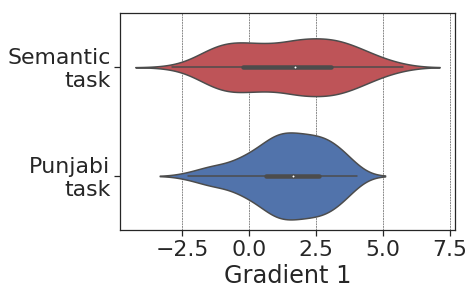

U-statistic =  16282.0 
two-tailed p value =  0.93963


In [5]:
import nibabel as nib
inputdirectory = ('/src/LittleBrain/LOAD_NIFTI_FILE_HERE/')
outputdirectory = ('/src/LittleBrain/OUTPUT_FILES')
requiredfilesfolder = ('/src/LittleBrain/DEFAULT_FILES')
## EXTRACT GRADIENT 1 AND GRADIENT 2 VALUES FROM EACH CLUSTER
## load clusters
CLUSTER1 = nib.load(outputdirectory+'/cluster1_image.dscalar.nii').get_data()
CLUSTER1 = CLUSTER1[0]; CLUSTER1[CLUSTER1 > 0.00000001] = 1
CLUSTER2 = nib.load(outputdirectory+'/cluster2_image.dscalar.nii').get_data()
CLUSTER2 = CLUSTER2[0]; CLUSTER2[CLUSTER2 > 0.00000001] = 1
## load gradients 1 and 2
gradients = nib.load(requiredfilesfolder+'/result_fromcerebellumtocerebellum.dscalar.nii').get_data()
gradients.shape = (8, 17853); gradient1 = gradients[0]; gradient2 = gradients[1]
## generate lists containing gradient 1 values and gradient 2 values for each cluster
CLUSTER1_gradient1 = gradient1[CLUSTER1>0.5]
CLUSTER1_gradient2 = gradient2[CLUSTER1>0.5]
CLUSTER2_gradient1 = gradient1[CLUSTER2>0.5]
CLUSTER2_gradient2 = gradient2[CLUSTER2>0.5]

## PLOT GRADIENT 1 VALUES FOR EACH TASK
import seaborn as sns; import matplotlib.pyplot as plt
datatoplot = [CLUSTER1_gradient1, CLUSTER2_gradient1]
labels = ['Semantic\ntask','Punjabi\ntask']
ax = sns.violinplot(data=datatoplot, orient='h', saturation=0.9, palette = ['r', 'b'])
sns.set_style('whitegrid')
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
ax.set_yticklabels(labels); plt.xlabel('Gradient 1')

## calculate t-test
from scipy.stats import mannwhitneyu as mannwhitneyu
g1 = mannwhitneyu(CLUSTER1_gradient1, CLUSTER2_gradient1, alternative='two-sided')
plt.show()
print('U-statistic = ',round(g1[0], 5),'\ntwo-tailed p value = ',round(g1[1], 5))

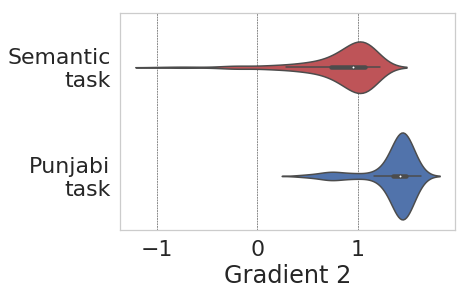

U-statistic =  2939.0 
two-tailed p value =  0.00000


In [6]:
## PLOT GRADIENT 2 VALUES FOR EACH TASK
import seaborn as sns; import matplotlib.pyplot as plt
datatoplot = [CLUSTER1_gradient2, CLUSTER2_gradient2]
labels = ['Semantic\ntask','Punjabi\ntask']
ax = sns.violinplot(data=datatoplot, orient='h', saturation=0.9, palette = ['r', 'b'])
sns.set_style('whitegrid')
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
ax.set_yticklabels(labels); plt.xlabel('Gradient 2')
g2 = mannwhitneyu(CLUSTER1_gradient2, CLUSTER2_gradient2, alternative='two-sided')
plt.savefig(os.path.abspath(outputdirectory+'/violing2.png'), format='png')
plt.show()
print('U-statistic = ',round(g2[0], 5),'\ntwo-tailed p value = ','{0:.5f}'.format(g2[1]))